In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import pearsonr
# import streamlit as st

In [112]:
df = pd.read_csv("jiji_car_dataset.csv")
df.head(20)

,title,make,model,year,condition,transmission,price
0,Toyota RAV4 3.5 Limited 2011 Silver,Toyota,RAV4 3,"2,011.00",foreign used,automatic,"₦ 16,800,000"
1,Toyota RAV4 2.5 Limited 4x4 2010 Black,Toyota,RAV4 2,"2,010.00",foreign used,automatic,"₦ 16,500,000"
2,Toyota Tundra 2012 Black,Toyota,Tundra,"2,012.00",local used,automatic,"₦ 24,200,000"
3,Lexus ES 350 2007 Black,Lexus,ES 350,"2,007.00",foreign used,automatic,"₦ 12,500,000"
4,Honda Accord 2013 Silver,Honda,Accord,"2,013.00",foreign used,automatic,"₦ 14,000,000"
5,Hyundai Sonata Limited 4dr Sedan (2.4L 4cyl 6A...,Hyundai,Sonata Limited,"2,014.00",foreign used,automatic,"₦ 12,500,000"
6,Toyota Camry Automatic 1999 Gray,Toyota,Camry Automatic,"1,999.00",local used,automatic,"₦ 2,550,000"
7,Toyota Camry SE 4dr Sedan (2.4L 4cyl 5A) 2009 ...,Toyota,Camry SE,"2,009.00",local used,automatic,"₦ 6,000,000"
8,Honda Accord 2008 Red,Honda,Accord,"2,008.00",local used,automatic,"₦ 4,700,000"
9,Toyota Camry 2010 Gray,Toyota,Camry,"2,010.00",local used,automatic,"₦ 7,400,000"


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   make          1993 non-null   object 
 2   model         1992 non-null   object 
 3   year          1993 non-null   float64
 4   condition     2000 non-null   object 
 5   transmission  1982 non-null   object 
 6   price         2000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 109.5+ KB


In [114]:
df.shape

(2000, 7)

In [115]:
df.isnull().sum()

title            0
make             7
model            8
year             7
condition        0
transmission    18
price            0
dtype: int64

In [116]:
df[df["make"].isna() & df["model"].isna()]

,title,make,model,year,condition,transmission,price
127,Mercedes-Benz GL-Class GL450 4MATIC 4dr SUV AW...,NaN,NaN,NaN,local used,automatic,"₦ 16,500,000"
325,Hyundai Veloster RE:FLEX 3dr Hatchback w/Black...,NaN,NaN,NaN,foreign used,automatic,"₦ 13,000,000"
672,Mercedes-Benz GL-Class GL450 4MATIC 4dr SUV AW...,NaN,NaN,NaN,local used,automatic,"₦ 35,000,000"
733,Mercedes-Benz M Class ML400 4MATIC 4dr SUV AWD...,NaN,NaN,NaN,foreign used,automatic,"₦ 36,000,000"
1148,Mercedes-Benz GL-Class GL450 4MATIC 4dr SUV AW...,NaN,NaN,NaN,foreign used,automatic,"₦ 32,000,000"
1459,Hyundai Santa Fe Limited 4dr SUV AWD w/Saddle ...,NaN,NaN,NaN,foreign used,automatic,"₦ 17,500,000"
1777,Land Rover Range Rover Evoque Dynamic 2dr SUV ...,NaN,NaN,NaN,local used,automatic,"₦ 13,500,000"


In [117]:
df["price"] = df["price"].replace(r"[₦,]", "", regex=True)

In [118]:
df["price"].astype(float)

0      16,800,000.00
1      16,500,000.00
2      24,200,000.00
3      12,500,000.00
4      14,000,000.00
            ...     
1995   18,900,000.00
1996   28,500,000.00
1997   37,500,000.00
1998   22,500,000.00
1999   24,000,000.00
Name: price, Length: 2000, dtype: float64

In [119]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [120]:
# mean_price = np.mean(df["price"])
# min_price = np.min(df["price"])
# max_price = np.max(df["price"])
# std_price = np.std(df["price"])
# median_price = np.median(df["price"])

In [121]:
# df["log_price"] = np.log(df["price"])

# Q1 = np.percentile(df["log_price"], 25)
# Q3 = np.percentile(df["log_price"], 75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# filtered_data = df[(df["log_price"] >= lower_bound) & (df["log_price"] <= upper_bound)]
# # lower_bond = mean_price -2 * std_price
# # upper_bond = mean_price +2 * std_price
# # anomalies = np.where(df["price"] < lower_bond)|(df["price"] > upper_bond)[0] +1
# # print("Anomalies:\n", anomalies)
# filtered_data
df = df[(df["price"] >= 3000000) & (df["price"] <= 50_000_000)]
df

,title,make,model,year,condition,transmission,price
0,Toyota RAV4 3.5 Limited 2011 Silver,Toyota,RAV4 3,"2,011.00",foreign used,automatic,16800000
1,Toyota RAV4 2.5 Limited 4x4 2010 Black,Toyota,RAV4 2,"2,010.00",foreign used,automatic,16500000
2,Toyota Tundra 2012 Black,Toyota,Tundra,"2,012.00",local used,automatic,24200000
3,Lexus ES 350 2007 Black,Lexus,ES 350,"2,007.00",foreign used,automatic,12500000
4,Honda Accord 2013 Silver,Honda,Accord,"2,013.00",foreign used,automatic,14000000
...,...,...,...,...,...,...,...
1995,Toyota Corolla SE (1.8L 4cyl 2A) 2018 Gray,Toyota,Corolla SE,"2,018.00",foreign used,automatic,18900000
1996,Mercedes-Benz C300 Sport 4Matic Sedan AWD (2.0...,Mercedes-Benz,C300 Sport,"2,016.00",foreign used,automatic,28500000
1997,Mercedes-Benz GLE-Class GLE 350 2016 Gray,Mercedes-Benz,GLE-Class GLE,"2,016.00",foreign used,automatic,37500000
1998,Hyundai Santa Fe 2017 White,Hyundai,Santa Fe,"2,017.00",foreign used,automatic,22500000


In [122]:
df["make"] = df["make"].str.title()

In [123]:
df["model"] = df["model"].str.title()

In [124]:
df["condition"]= df["condition"].str.title()

In [125]:
df["transmission"] = df["transmission"].str.title()

In [126]:
df["transmission"]= df["transmission"].fillna(df["transmission"].mode()[0])
df["transmission"]

0       Automatic
1       Automatic
2       Automatic
3       Automatic
4       Automatic
          ...    
1995    Automatic
1996    Automatic
1997    Automatic
1998    Automatic
1999    Automatic
Name: transmission, Length: 1699, dtype: object

In [127]:
df["make"] = df["make"].replace(r"-", " ", regex=True)
df["make"]

0              Toyota
1              Toyota
2              Toyota
3               Lexus
4               Honda
            ...      
1995           Toyota
1996    Mercedes Benz
1997    Mercedes Benz
1998          Hyundai
1999             Land
Name: make, Length: 1699, dtype: object

In [128]:
df["model"] = df["model"].replace(r"-", " ", regex=True)
df["model"]

0              Rav4 3
1              Rav4 2
2              Tundra
3              Es 350
4              Accord
            ...      
1995       Corolla Se
1996       C300 Sport
1997    Gle Class Gle
1998         Santa Fe
1999      Rover Range
Name: model, Length: 1699, dtype: object

In [129]:
df["year"]= pd.to_numeric(df["year"], errors="coerce")

In [130]:
df.dropna(subset=["make","model","year"], inplace=True)
df

,title,make,model,year,condition,transmission,price
0,Toyota RAV4 3.5 Limited 2011 Silver,Toyota,Rav4 3,"2,011.00",Foreign Used,Automatic,16800000
1,Toyota RAV4 2.5 Limited 4x4 2010 Black,Toyota,Rav4 2,"2,010.00",Foreign Used,Automatic,16500000
2,Toyota Tundra 2012 Black,Toyota,Tundra,"2,012.00",Local Used,Automatic,24200000
3,Lexus ES 350 2007 Black,Lexus,Es 350,"2,007.00",Foreign Used,Automatic,12500000
4,Honda Accord 2013 Silver,Honda,Accord,"2,013.00",Foreign Used,Automatic,14000000
...,...,...,...,...,...,...,...
1995,Toyota Corolla SE (1.8L 4cyl 2A) 2018 Gray,Toyota,Corolla Se,"2,018.00",Foreign Used,Automatic,18900000
1996,Mercedes-Benz C300 Sport 4Matic Sedan AWD (2.0...,Mercedes Benz,C300 Sport,"2,016.00",Foreign Used,Automatic,28500000
1997,Mercedes-Benz GLE-Class GLE 350 2016 Gray,Mercedes Benz,Gle Class Gle,"2,016.00",Foreign Used,Automatic,37500000
1998,Hyundai Santa Fe 2017 White,Hyundai,Santa Fe,"2,017.00",Foreign Used,Automatic,22500000


In [131]:
df.isnull().sum()


title           0
make            0
model           0
year            0
condition       0
transmission    0
price           0
dtype: int64

In [132]:
count = df["make"].value_counts()
frequency_count = count.head(10)
count

make
Toyota           682
Mercedes Benz    234
Lexus            216
Honda            150
Hyundai          134
Ford              52
Acura             21
Volkswagen        20
Bmw               19
Land              16
Kia               16
Mazda             16
Nissan            15
Peugeot           13
Audi              12
Infiniti          12
Opel               8
Dodge              7
Chevrolet          5
Pontiac            5
Jeep               5
New                5
Mitsubishi         4
Volvo              3
Gac                3
Porsche            3
Suzuki             2
Changan            2
Lincoln            2
Rover              1
Hummer             1
Jaguar             1
Genesis            1
Jac                1
Chrysler           1
Mini               1
Maserati           1
Buick              1
Dongfeng           1
Name: count, dtype: int64

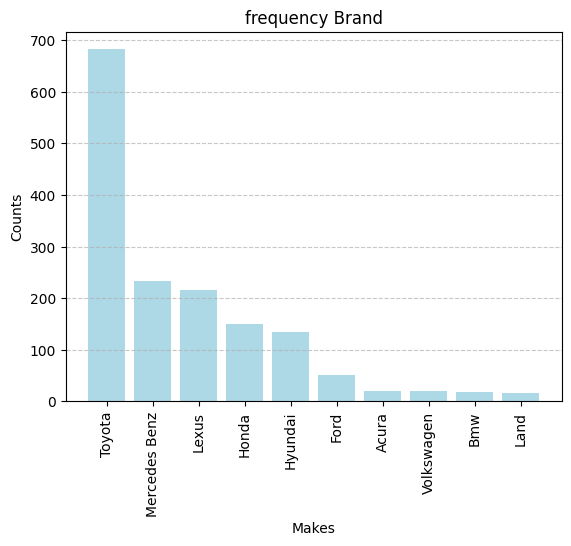

In [133]:
plt.bar(frequency_count.index, frequency_count.values, color="lightblue")
plt.title("frequency Brand")
plt.xlabel("Makes")
plt.ylabel("Counts")
plt.grid(axis="y",linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()


In [134]:
# df.groupby("make")["model"].value_counts().reset_index()
df.groupby("make")["model"].agg(lambda x: x.mode()[0])

make
Acura                           Mdx
Audi                             A4
Bmw                        3 Series
Buick                      Lacrosse
Changan                        Cs75
Chevrolet                    Camaro
Chrysler                    Voyager
Dodge                       Charger
Dongfeng                 Lingzhi M3
Ford                           Edge
Gac                             Ga4
Genesis                         G80
Honda                        Accord
Hummer                           H3
Hyundai                      Sonata
Infiniti                       Fx35
Jac                           Js3 1
Jaguar                         Xf R
Jeep             Wrangler Unlimited
Kia                        Sportage
Land                    Rover Range
Lexus                        Rx 350
Lincoln                         Mks
Maserati                Granturismo
Mazda                             6
Mercedes Benz               M Class
Mini                       Cooper S
Mitsubishi             

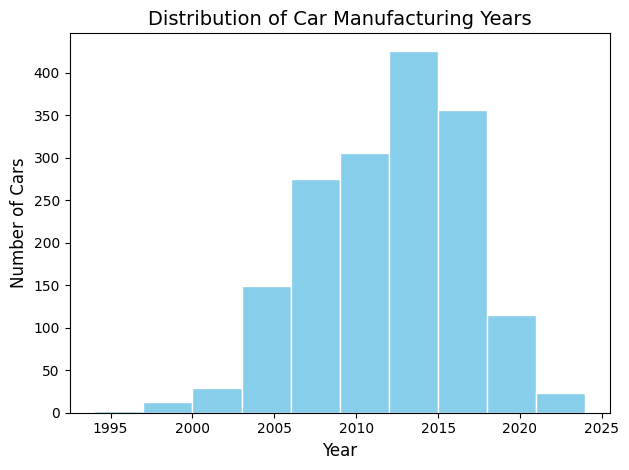

In [135]:
plt.hist(df["year"],edgecolor="white", color="skyblue")
plt.title("Distribution of Car Manufacturing Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.tight_layout()
plt.show()


In [136]:
# pd.set_option('display.float_format', '{:,.2f}'.format)

In [137]:
pd.set_option('display.float_format', '{:,.2f}'.format)
avg = df.groupby(["make", "model"])["price"].agg({
    "mean",
    "median"
})
avg.sort_values(by="mean", ascending=False)


mean        median
make          model                                          
Mercedes Benz Metris 2            49,750,000.00 49,750,000.00
              Gle43 3             48,250,000.00 48,250,000.00
Jeep          Wrangler Rubicon    48,000,000.00 48,000,000.00
Mercedes Benz C43                 48,000,000.00 48,000,000.00
Toyota        Highlander Platinum 47,000,000.00 47,000,000.00
...                                         ...           ...
Acura         Mdx Touring          3,300,000.00  3,300,000.00
Volkswagen    Golf 1               3,250,000.00  3,250,000.00
Peugeot       407                  3,190,000.00  3,190,000.00
Mercedes Benz C240                 3,100,000.00  3,100,000.00
              C320                 3,000,000.00  3,000,000.00

[394 rows x 2 columns]

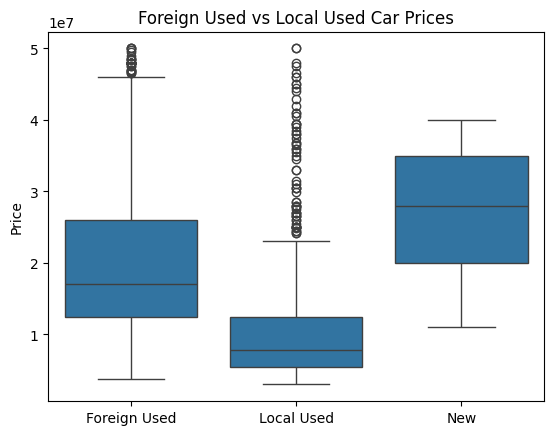

In [138]:

sns.boxplot(data=df, x='condition', y='price', )
plt.title("Foreign Used vs Local Used Car Prices")
plt.xlabel("")
plt.ylabel("Price")
plt.show()


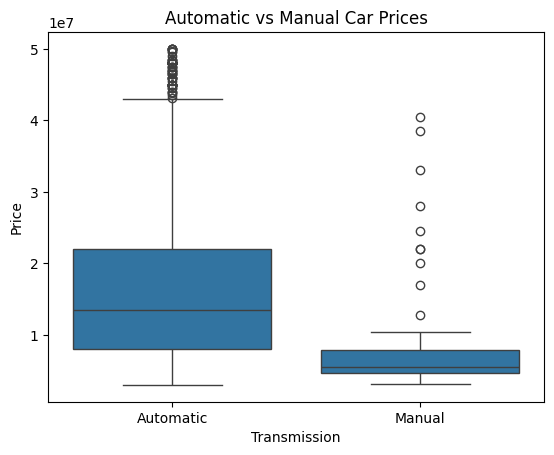

In [139]:

sns.boxplot(data=df, x="transmission", y="price")
plt.title("Automatic vs Manual Car Prices")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()


In [140]:
df.groupby('transmission')['price'].mean()

transmission
Automatic   16,515,111.69
Manual       9,102,142.86
Name: price, dtype: float64

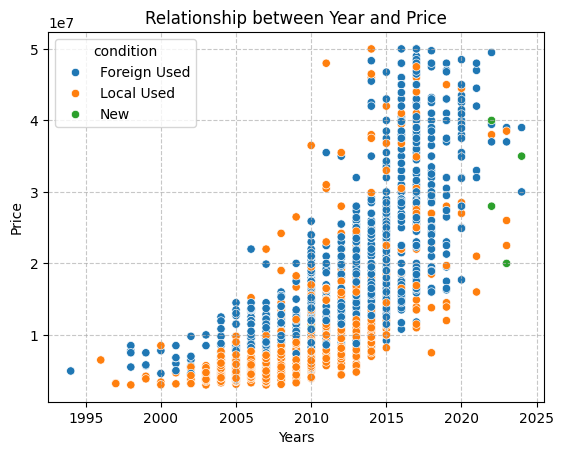

In [141]:
sns.scatterplot(df,x ="year", y ="price", hue= "condition")
plt.title("Relationship between Year and Price")
plt.xlabel("Years")
plt.ylabel("Price")
plt.grid(True, linestyle="--",alpha=0.7)

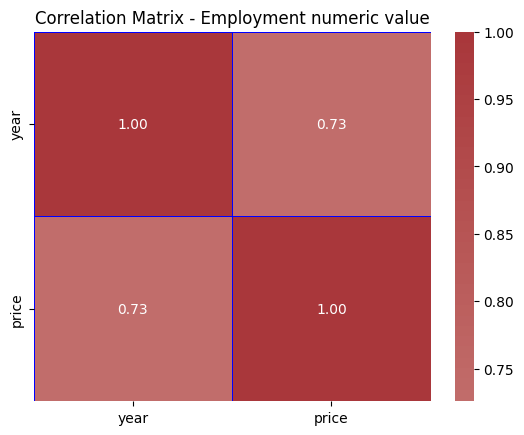

In [142]:
num_cols = ["year","price"]
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True, fmt=".2f", cmap="vlag", center = 0, linewidth="0.5",linecolor= "blue")
plt.title("Correlation Matrix - Employment numeric value")
plt.show()

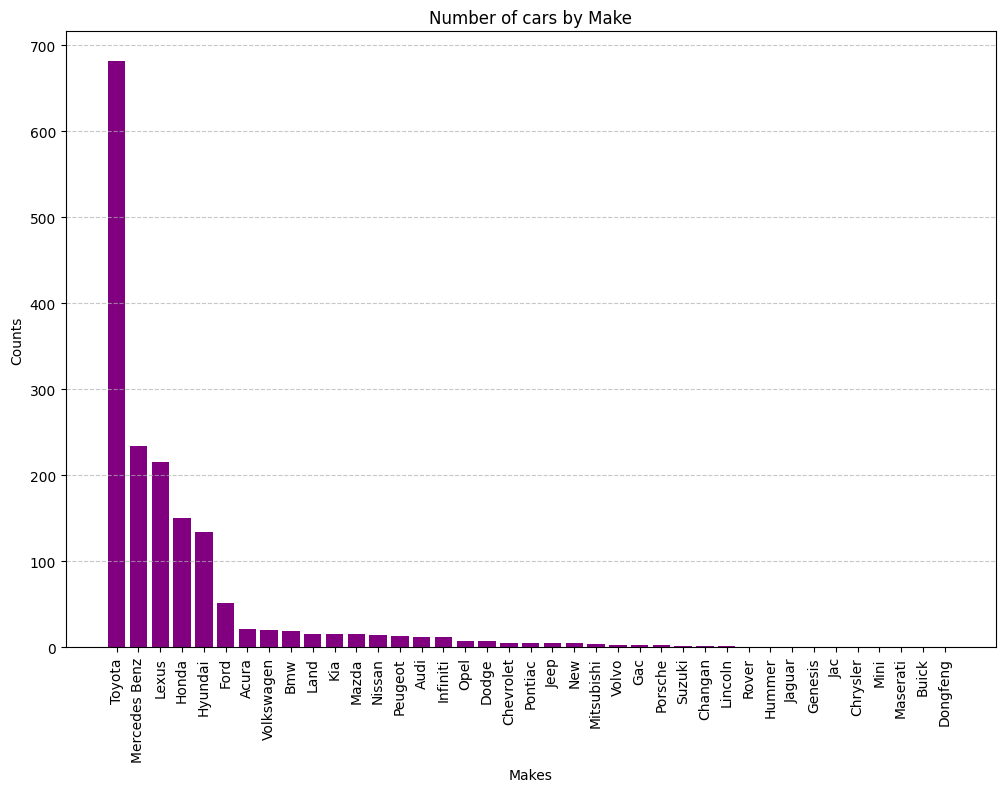

In [143]:
plt.figure(figsize=(12,8))
plt.bar(count.index, count.values, color="purple")
plt.title("Number of cars by Make")
plt.xlabel("Makes")
plt.ylabel("Counts")
plt.grid(axis="y",linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()


In [144]:
avg_price = df.groupby("make")["price"].mean()
avg_price

make
Acura            9,244,761.90
Audi            13,729,166.67
Bmw             13,536,578.95
Buick           12,100,000.00
Changan         26,000,000.00
Chevrolet       18,480,000.00
Chrysler        13,500,000.00
Dodge           18,642,857.14
Dongfeng        37,500,000.00
Ford            13,615,288.56
Gac             18,133,333.33
Genesis         30,000,000.00
Honda           11,488,371.24
Hummer          14,500,000.00
Hyundai         14,132,368.47
Infiniti        12,762,333.33
Jac             22,500,000.00
Jaguar          11,000,000.00
Jeep            28,480,000.00
Kia              9,570,625.00
Land            22,577,187.50
Lexus           19,455,478.87
Lincoln         12,000,000.00
Maserati        24,200,000.00
Mazda           11,483,593.75
Mercedes Benz   24,370,982.91
Mini            18,200,000.00
Mitsubishi       6,055,000.00
New             26,800,000.00
Nissan          10,034,666.67
Opel             4,487,500.00
Peugeot          4,603,076.92
Pontiac          7,660,000.00
Porsc

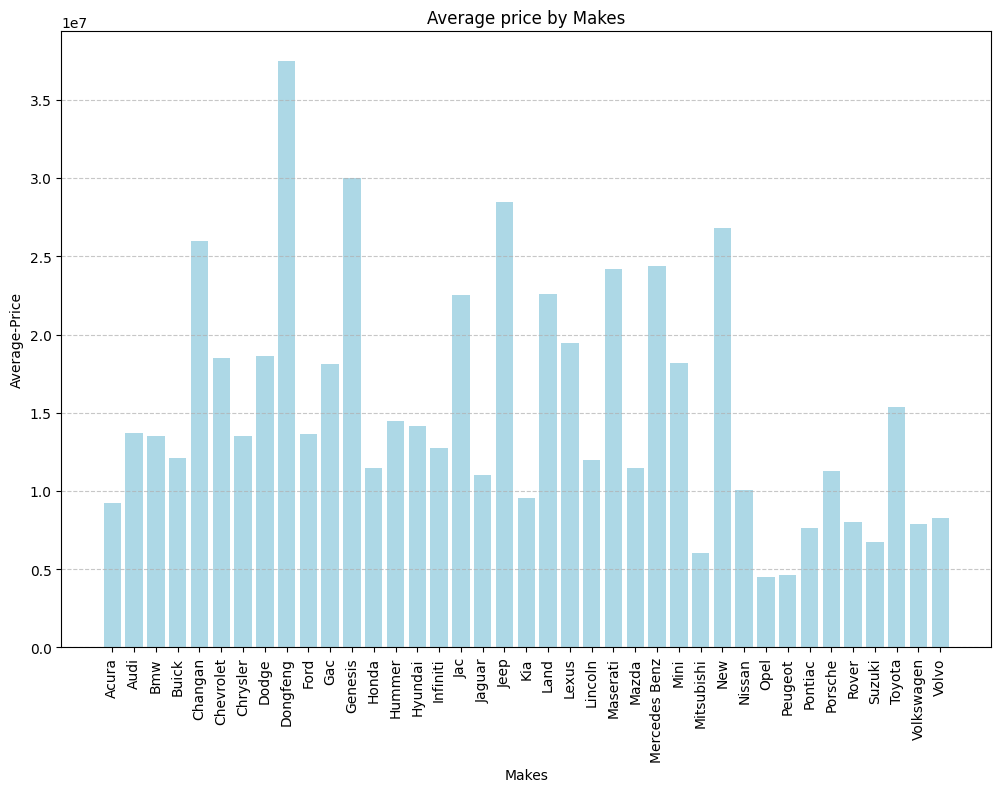

In [145]:
plt.figure(figsize=(12,8))
plt.bar(avg_price.index, avg_price.values, color="lightblue")
plt.title("Average price by Makes")
plt.xlabel("Makes")
plt.ylabel("Average-Price")
plt.grid(axis="y",linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()


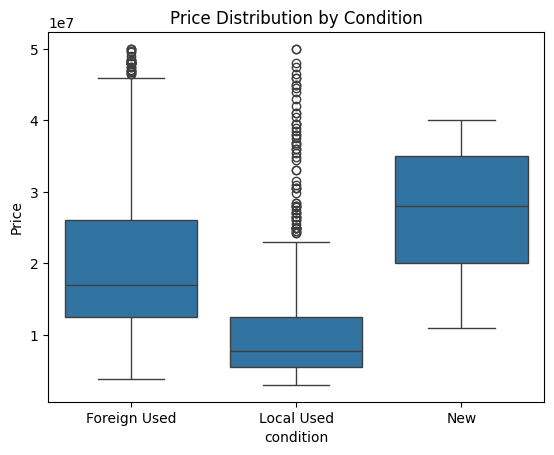

In [146]:
sns.boxplot(data=df, x='condition', y='price')
plt.title("Price Distribution by Condition")
plt.xlabel("condition")
plt.ylabel("Price")
plt.show()


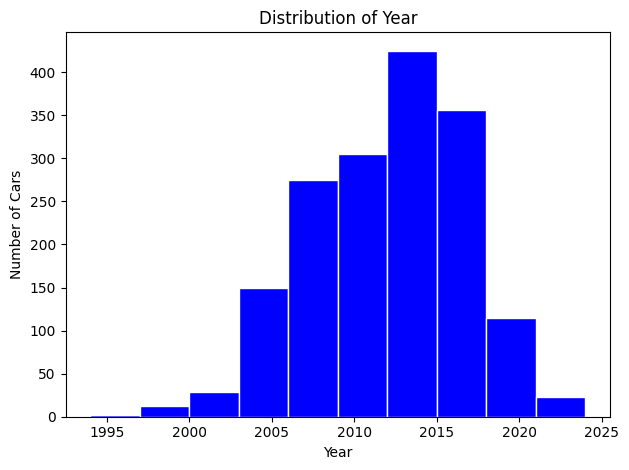

In [147]:
plt.hist(df["year"],edgecolor="white", color="blue")
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()

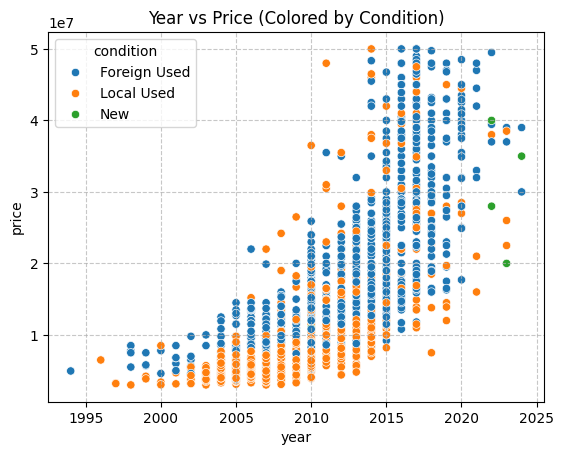

In [148]:
# plt.scatter(df["year"], df["price"],color="tomato")
# plt.title("Relationship between Year and Price")
# plt.xlabel("Years")
# plt.ylabel("Price")
# 
sns.scatterplot(data=df, x='year', y='price', hue='condition')
plt.title("Year vs Price (Colored by Condition)")
plt.grid(True, linestyle="--",alpha=0.7)
plt.show()


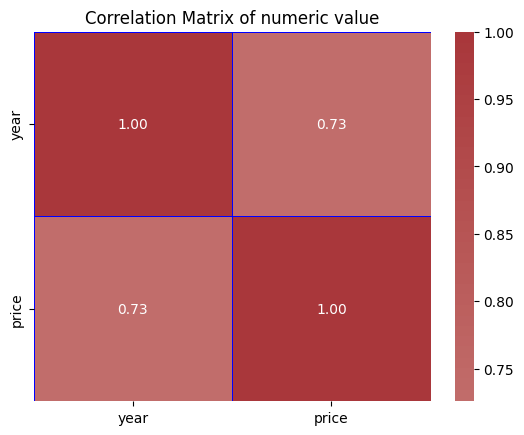

In [149]:
sns.heatmap(corr,annot=True, fmt=".2f", cmap="vlag", center = 0, linewidth="0.5",linecolor= "blue")
plt.title("Correlation Matrix of numeric value")
plt.show()

                                             __Summary of Findings__

The brands that dominate the higher price  is Rolls Royce.
Foreign Used cars is generally cost more than Local Used ones,because they may have lower mileage or better features.
The car price decreases as the vehicle gets older, so the year of the car usually has a strong positive correlation with price. 
Yes, automatic cars are generally listed more frequently and tend to have higher prices than manual cars.

                                             __Business Insights & Recommendations__

The product performs best overall is Toyota.
The sales channel that contributes the most revenue is Foreign Used Car.
The period that has  records of  the most released car is 2015.
The strategy to improve underperfoming channels is to focus on selling Foreign Used Car.